In [1]:
import sqlite3
import pandas as pd

print(">> All imports succefully done!")

>> All imports succefully done!


In [2]:
print(">> Prepering to connect SQLITE dataset!")
dat = sqlite3.connect('B2W_Reviews01.db')
print(">> Successfully connected SQLITE dataset!")

>> Prepering to connect SQLITE dataset!
>> Successfully connected SQLITE dataset!


In [3]:
print(">> Prepering to read SQLITE dataset!")
df = pd.read_sql_query("SELECT * FROM B2W_Reviews01", dat)
print(">> Successfully read SQLITE dataset!")

>> Prepering to read SQLITE dataset!
>> Successfully read SQLITE dataset!


In [4]:
# Columns of Dataframe
for col in df.columns:
    print(col)

submission_date
reviewer_id
product_id
product_name
product_brand
site_category_lv1
site_category_lv2
review_title
overall_rating
recommend_to_a_friend
review_text
reviewer_birth_year
reviewer_gender
reviewer_state


In [5]:
df.groupby(['reviewer_gender']).size().reset_index(name='counts')

,reviewer_gender,counts
0,F,62071
1,M,66166
2,null,4136


In [6]:
df.groupby(['overall_rating']).size().reset_index(name='counts')

,overall_rating,counts
0,1,27369
1,2,8389
2,3,16315
3,4,32345
4,5,47955


In [7]:
df.groupby(['recommend_to_a_friend']).size().reset_index(name='counts')

,recommend_to_a_friend,counts
0,No,35987
1,Yes,96368
2,null,18


In [8]:
df.groupby(['recommend_to_a_friend', 'overall_rating']).size().reset_index(name='counts')

,recommend_to_a_friend,overall_rating,counts
0,No,1,26574
1,No,2,6321
2,No,3,1879
3,No,4,508
4,No,5,705
5,Yes,1,795
6,Yes,2,2068
7,Yes,3,14434
8,Yes,4,31837
9,Yes,5,47234


In [9]:
# df.loc[(df['overall_rating'] == 3) & (df['recommend_to_a_friend'] == 'null')]

df_negative = df.loc[(df['overall_rating'] == 1) | (df['overall_rating'] == 2)]
df_neutral = df.loc[(df['overall_rating'] == 3)]
df_positive = df.loc[(df['overall_rating'] == 4) | (df['overall_rating'] == 5)]

In [10]:
print("Negative:", df_negative['overall_rating'].size)
print("Neutral:",df_neutral['overall_rating'].size)
print("Positive:",df_positive['overall_rating'].size)
print("-----------------")
print('No:', df.loc[(df['recommend_to_a_friend'] == 'No')]['recommend_to_a_friend'].size)
print('Yes:', df.loc[(df['recommend_to_a_friend'] == 'Yes')]['recommend_to_a_friend'].size)
print("-----------------")
print('F:', df.loc[(df['reviewer_gender'] == 'F')]['reviewer_gender'].size)
print('M:', df.loc[(df['reviewer_gender'] == 'M')]['reviewer_gender'].size)

Negative: 35758
Neutral: 16315
Positive: 80300
-----------------
No: 35987
Yes: 96368
-----------------
F: 62071
M: 66166


In [11]:
df_negative[['overall_rating', 'review_text']]

,overall_rating,review_text
9,1,MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ES...
13,1,Esse celular não vale nada a bateria não vale ...
15,2,a mochila nao esta fechando direito por isso n...
25,1,Eu não recebi o produto e a americanas sabe di...
28,2,"Gostaria de cancelar esta compra, peço sua gen..."
...,...,...
132356,2,"O produto não tem uma trava para a tampa, quan..."
132364,1,"O travesseiro quando colocamos a cabeça, ele f..."
132365,1,Infelizmente o Netflix não funciona e esse era...
132371,1,"Material fraco, poderia ser melhor. Ficou deve..."


In [12]:
neg = df_negative[['recommend_to_a_friend', 'review_text']].sample(n=5, random_state=1)
neg

,recommend_to_a_friend,review_text
90962,No,Comprei o produto e veio faltando a haste/cabo...
79693,No,quando escolhi no site aparecia a colher no po...
43751,No,"Mercadoria atrasada, amassada. Não gostei e nã..."
107527,No,"Comprei 3 banquetas, sendo que 1 delas veio qu..."
43348,No,Não tem como avaliar! O produto nunca chegou! ...


In [14]:
reviews = df['review_text'].tolist()
num_words = []

for rev in reviews:
    num_words.append(len(rev.split(" ")))



In [15]:
import statistics

print("statistics imported")

statistics imported


In [58]:
mean_words = statistics.mean(num_words)
geo_mean_words = statistics.geometric_mean(num_words)
harmonic_mean_words = statistics.harmonic_mean(num_words)
median_words = statistics.median(num_words)
mode_words = statistics.mode(num_words)
multimode = statistics.multimode(num_words)


stdev = statistics.stdev(num_words)
pstdev = statistics.pstdev(num_words)
quantiles = statistics.quantiles(num_words)
max_value = max(num_words)
min_value = min(num_words)
bigger_75 = sum( y > 75 for y in num_words )
bigger_150 = sum( y > 150 for y in num_words )

In [59]:
print(">> MEAN: ", mean_words)
print(">> GEOMETRIC MEAN: ", geo_mean_words)
print(">> HARMONIC MEAN: ", harmonic_mean_words)
print(">> MEDIAN: ", median_words)
print(">> MODE: ", mode_words)
print(">> MULTIMODE: ", multimode)
print(">> STANDARD DEVIATION SAMPLE: ", stdev)
print(">> STANDARD DEVIATION POPULATION: ", pstdev)
print(">> QUANTILES: ", quantiles)
print(">> MAX VALUE: ", max_value)
print(">> MIN VALUE: ", min_value)
print(">>NUM ITEMS: ", len(num_words))
print(">>NUM ITEMS > 75: ", bigger_75)
print(">>NUM ITEMS > 150: ", bigger_150)


>> MEAN:  24.296533280956087
>> GEOMETRIC MEAN:  18.47804203265341
>> HARMONIC MEAN:  14.861573589133467
>> MEDIAN:  16
>> MODE:  10
>> MULTIMODE:  [10]
>> STANDARD DEVIATION SAMPLE:  24.505055449178855
>> STANDARD DEVIATION POPULATION:  24.5049628883782
>> QUANTILES:  [11.0, 16.0, 28.0]
>> MAX VALUE:  796
>> MIN VALUE:  1
>>NUM ITEMS:  132373
>>NUM ITEMS > 75:  4892
>>NUM ITEMS > 150:  688


<Figure size 3600x3600 with 0 Axes>

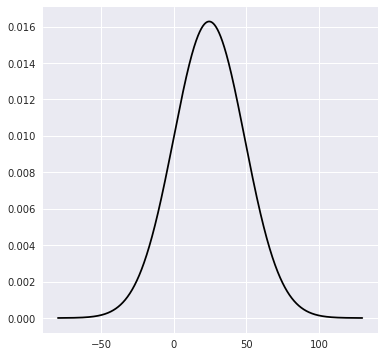

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))


# A custom function to calculate
# probability distribution function

# To generate an array of x-values
x = np.arange(-80, 130, 0.1)


mean = mean_words
std = pstdev
y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


  
# To generate an array of
# y-values using corresponding x-values
y = y_out
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'solid')
  
# plt.scatter( x, y, marker = 'o', s = 25, color = 'red')


plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()